<a href="https://colab.research.google.com/github/KaranSantra/fastbook/blob/master/dogs_cats_test_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio Pets

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

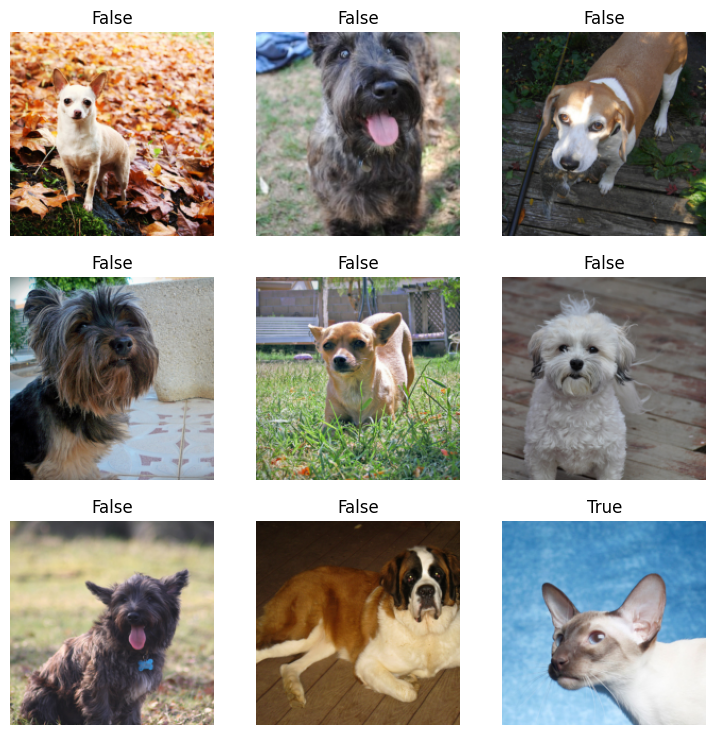

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.196979,0.055951,0.018945,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.090064,0.060604,0.018268,00:59
1,0.047114,0.021975,0.008796,01:01
2,0.022858,0.019036,0.007442,01:02


In [6]:
learn.export('model.pkl')